# Travel Review Clustering

### Context:
In summary, our data set includes user ratings from Google reviews for attractions in Europe, covering 24 different categories. We use a scale of 1 to 5 for the ratings, and for each category, we calculate the average rating to give an idea of the overall user satisfaction for attractions in that category.

### Data Definition:
Input variables:

1) User Unique user id

2) Attribute 1: Average ratings on churches

3) Attribute 2: Average ratings on resorts

4) Attribute 3: Average ratings on beaches

5) Attribute 4: Average ratings on parks

6) Attribute 5: Average ratings on theatres

7) Attribute 6: Average ratings on museums

8) Attribute 7: Average ratings on malls

9) Attribute 8: Average ratings on zoo

10) Attribute 9: Average ratings on restaurants

11) Attribute 10: Average ratings on pubs/bars

12) Attribute 11: Average ratings on local services

13) Attribute 12: Average ratings on burger/pizza shops

14) Attribute 13: Average ratings on hotels/other lodgings

15) Attribute 14: Average ratings on juice bars

16) Attribute 15: Average ratings on art galleries

17) Attribute 16: Average ratings on dance clubs

18) Attribute 17: Average ratings on swimming pools

19) Attribute 18: Average ratings on gyms

20) Attribute 19: Average ratings on bakeries

21) Attribute 20: Average ratings on beauty & spas

22) Attribute 21: Average ratings on cafes

23) Attribute 22: Average ratings on view points

24) Attribute 23: Average ratings on monuments

25) Attribute 24: Average ratings on gardens

### 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read the Data

In [2]:
#Read the data

Data = pd.read_csv(r"C:\Users\ASUS\Downloads\google_review_ratings.csv")

#Printing the first 5 rows of the data

Data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


### 3. Data Types and Dimensions

In [3]:
# Check the datatype

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

### The 24 features given to us will be renamed with categories and also we will drop (Unnamed: 25) features as it is redundant.

In [4]:
#Get the shape
Data.shape

(5456, 26)

**We see that dataframe has 5456 rows and and 26 columns**

### 4. Data Manipulation

Here we will change feature name and remove redundant features

In [5]:
# Using drop() function to remove redundant feature

data = Data.drop(["Unnamed: 25"], axis = 1)
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


**Renaming features**

To perform the action we will create list containing actual names of features

In [6]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

Applying above column names to dataframe column

In [7]:
data.columns = column_names

Checking coulmn names was updated or not.

In [8]:
data.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Columns Are Renamed

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   object 
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

**Since local_services is numeric, it is represented as categorical**

In [10]:
# Changing datatype of local_services

data['local_services'] = pd.to_numeric(data['local_services'], errors = 'coerce')

**We have encountered an error specifying that features have a invalid string. So to change data type we need to release this error**

In [11]:
data['local_services'].unique() #Getting all the unique values.

array([1.7 , 1.73, 1.71, 1.69, 1.67, 1.65, 1.66, 1.64, 1.63, 5.  , 1.56,
       1.55, 1.53, 1.52, 1.51, 1.5 , 1.49, 1.48, 1.46, 2.13, 2.12, 2.1 ,
       2.09, 2.08, 2.07, 2.06, 2.05, 2.04, 2.03, 2.01, 2.  , 1.98, 1.97,
       1.95, 1.93, 1.91, 1.9 , 1.88, 1.86, 1.84, 1.83, 1.81, 1.79, 1.77,
       1.74, 1.72, 1.68, 1.61, 1.6 , 1.59, 1.58, 1.99, 2.47, 2.35, 2.48,
       2.59, 3.39, 2.31, 2.78, 2.79, 2.77, 2.76, 2.75, 2.74, 2.72, 2.71,
       2.69, 2.68, 2.66, 2.65, 2.63, 2.61, 2.57, 2.55, 2.53, 2.51, 2.49,
       1.94, 1.92, 1.82, 1.76, 1.62, 4.08, 4.04, 4.02, 4.01, 4.  , 3.99,
       3.98, 3.96, 3.95, 3.94, 3.93, 3.91, 3.9 , 3.88, 3.87, 3.86, 3.84,
       3.85, 2.17, 3.  , 2.99, 2.82, 2.83, 2.81, 2.8 , 2.73, 2.67, 2.64,
       2.62, 2.54, 2.52, 2.5 , 2.02, 1.57, 1.54, 1.47, 1.87, 1.85, 1.78,
       2.6 , 1.45, 1.43, 1.41, 1.39, 1.37, 1.36, 1.34, 1.32, 1.3 , 1.28,
       1.26, 1.24, 1.22, 1.2 , 1.18, 1.16, 1.14, 1.12, 1.1 , 1.08, 1.07,
       1.05, 1.03, 1.01, 0.99, 0.97, 0.96, 0.94, 0.

**Drop rows where local_services is equal to '2\t2.'**

In [12]:
# Get row numbers where local_services is invalid
data[data['local_services'] == '2\t2.']['local_services']

Series([], Name: local_services, dtype: float64)

In [13]:
data = data.drop(data[data['local_services'] == '2\t2.'].index)

Now, we can changing data type of local_services

In [14]:
data[['local_services']] = data[['local_services']].apply(pd.to_numeric)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5455 non-null   float64
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

All the features are numerics expect user_id as it is categorical in nature

In [16]:
data_manipulated = data.copy(deep = True)  # Creating a copy of dataframe

### 5. Statistical Summary

In [17]:
# Dataframe with numerical features

data_manipulated.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.**

**user_id is unique for all instances**

### 6. Handling Missing Values

First we have to count the missing values with the help of built-in function (isnull().sum())

In [18]:
# Get the count of missing values
missing_values = data_manipulated.isnull().sum()

# Get the print of the missing values
print(missing_values)

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           1
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64


**There is only one missing value, so replace it with mean.**

In [19]:
data_no_missing = data_manipulated.fillna(data_manipulated.mean())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12832\3154654579.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_no_missing = data_manipulated.fillna(data_manipulated.mean())


In [20]:
data_manipulated.local_services.fillna(data_manipulated.local_services.mean(), inplace = True)
data_manipulated.burger_pizza_shops.fillna(data_manipulated.burger_pizza_shops.mean(), inplace = True)
data_manipulated.gardens.fillna(data_manipulated.gardens.mean(), inplace = True)

In [21]:
# Rechecking the missing values
missing_values = data_manipulated.isnull().sum()

# Printing the missing values
print(missing_values)

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  0
dtype: int64


### 7. Exploratory Data Analysis

**PDF's of features**

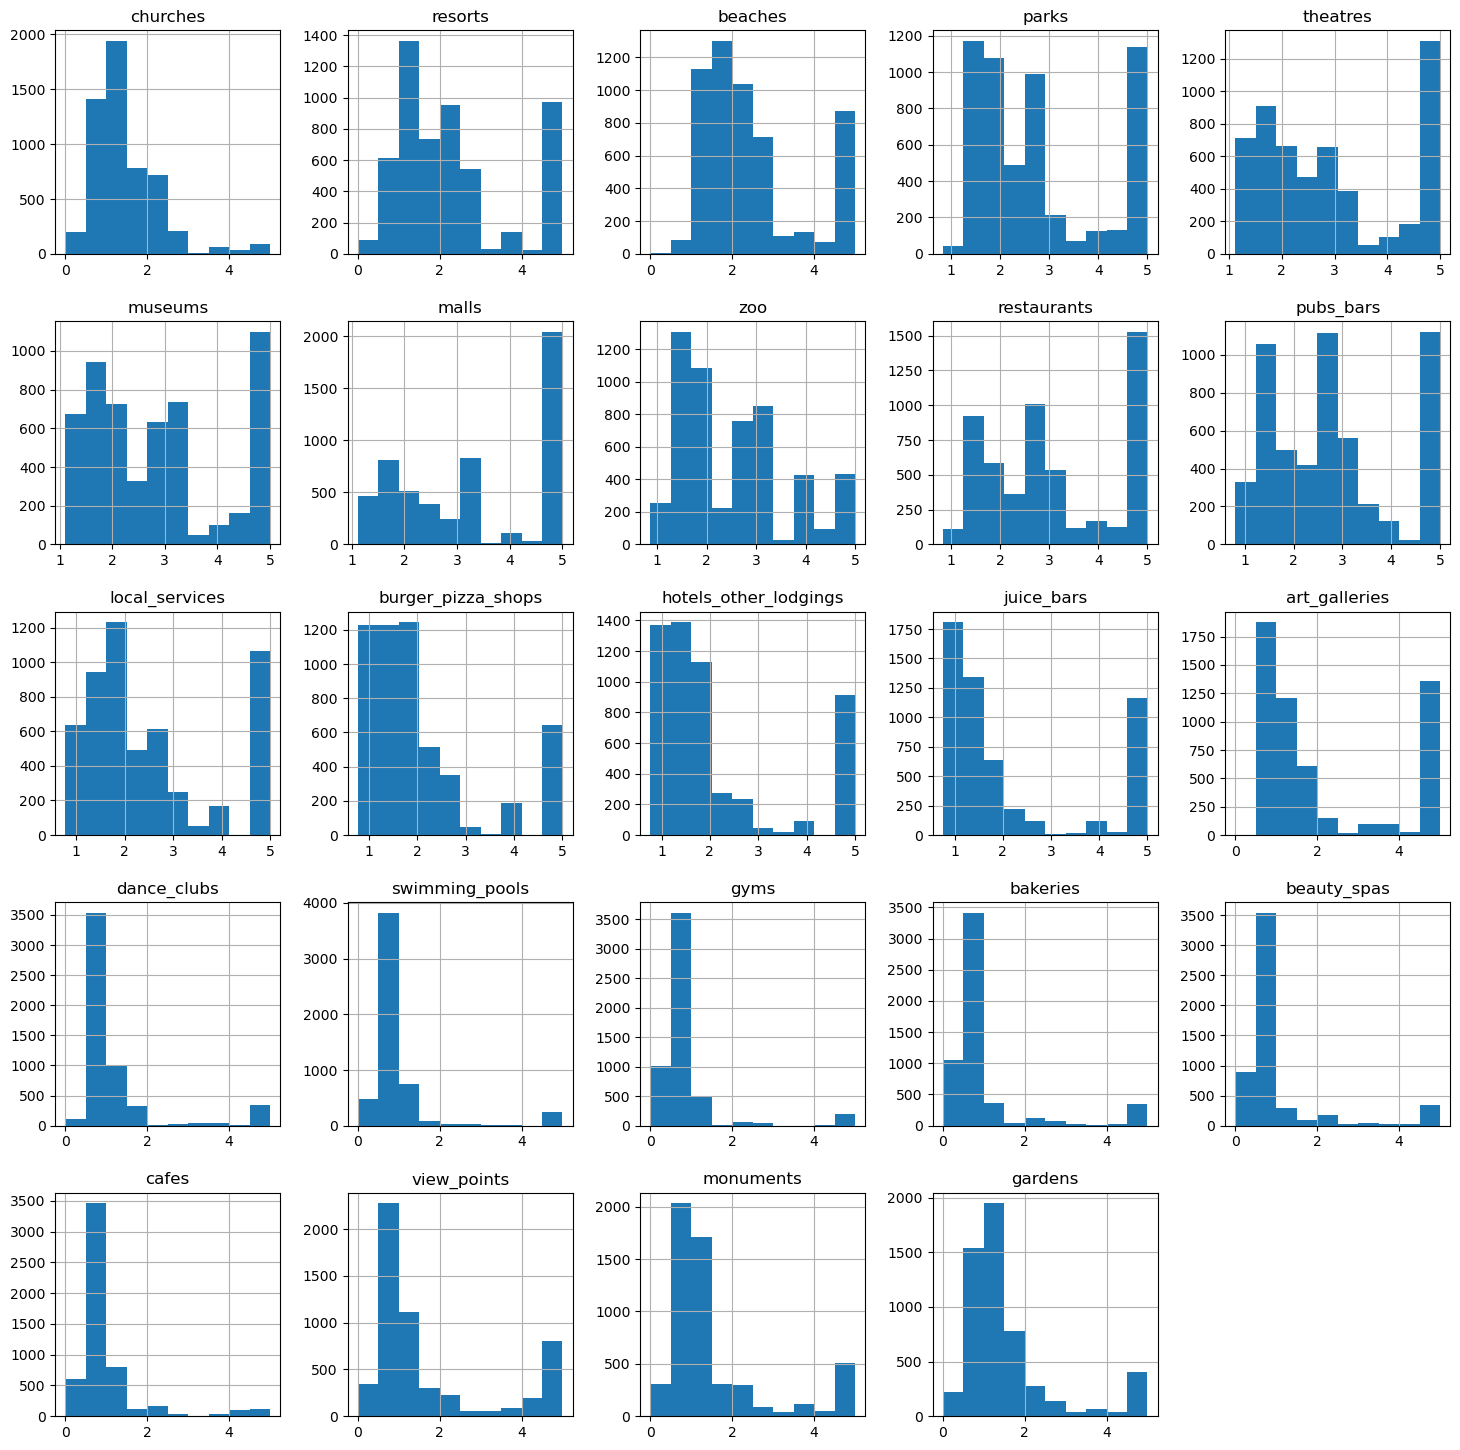

In [22]:
fig = data_no_missing.hist(figsize = (18, 18))

**Let's check if users have rated all the products**

In [23]:
data_description = data_no_missing.describe()
rated = data_description.loc['min'] > 0
rated[rated]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
burger_pizza_shops       True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

**Ratings given by all the users and min value is greater than 0**

In [24]:
# Creating the dataframe containg number of review for each feature
reviews = data_no_missing[column_names[1:]].astype(bool).sum(axis=0).sort_values()
reviews

bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5231
churches                 5261
dance_clubs              5344
resorts                  5366
art_galleries            5452
beaches                  5452
pubs_bars                5456
local_services           5456
zoo                      5456
hotels_other_lodgings    5456
juice_bars               5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
restaurants              5456
burger_pizza_shops       5456
dtype: int64

In [25]:
columm_names = data_no_missing.columns.values

Text(0.5, 1.0, 'No of reviews under each categories')

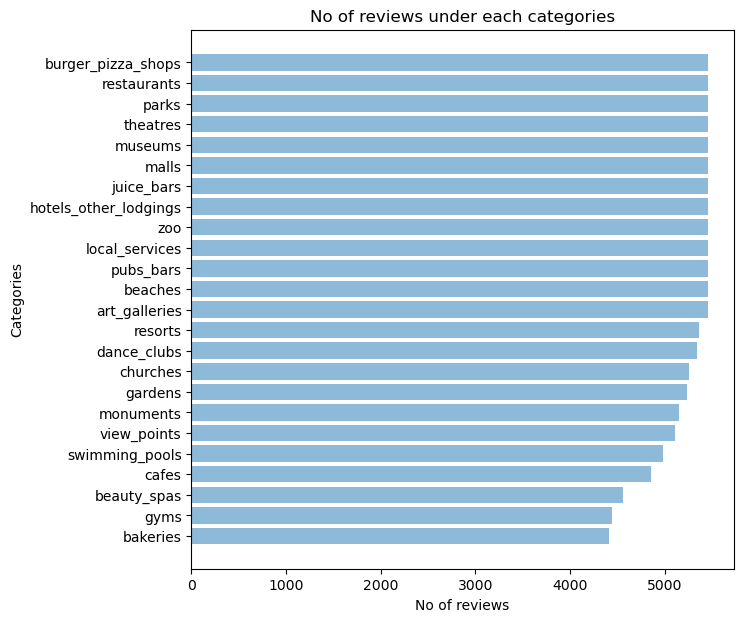

In [26]:
plt.figure(figsize = (7, 7))
plt.barh(np.arange(len(column_names[1:])),reviews.values, align = 'center', alpha = 0.5)
plt.yticks(np.arange(len(column_names[1:])),reviews.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each categories')

**Now let's check how many users have given review to the features**

In [27]:
# Creating a dataframe to store number of review by users
no_of_reviews = data_no_missing[column_names[1:]].astype(bool).sum(axis = 1).value_counts()
no_of_reviews

24    3725
23     505
21     457
20     243
22     167
19     148
18     114
17      69
16      22
15       6
dtype: int64

Text(0.5, 1.0, 'No of Categories vs No of reviews')

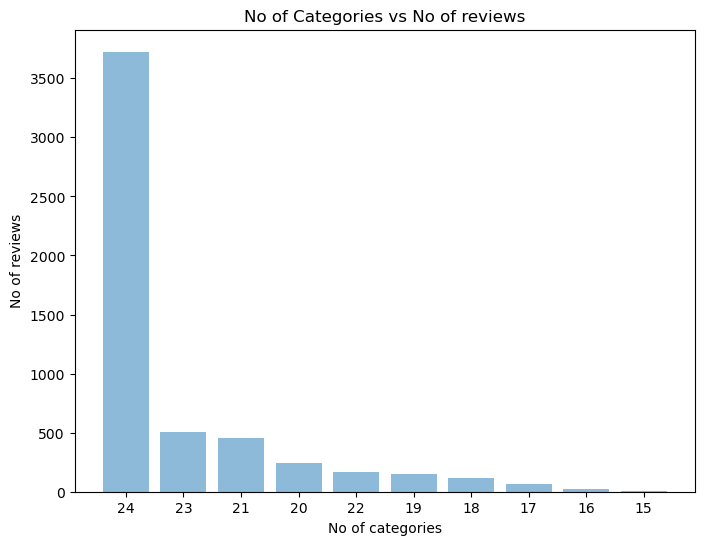

In [28]:
# Plotting the number of customers vs numbe of review
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

**Conclusion**

Around 3500 users have given a rating for all the 24 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommender system can be built.

**Now let's check Average rating per feature**

In [29]:
# Creating a dataframe to store average rating per feature
avg_rating = data_no_missing[column_names[1:]].mean() #average rating is calculated by dividing count by it's mean
avg_rating = avg_rating.sort_values() # sorting in increasing order
avg_rating

gyms                     0.822414
swimming_pools           0.949203
cafes                    0.965838
bakeries                 0.969811
beauty_spas              1.000071
dance_clubs              1.192801
churches                 1.455720
monuments                1.531453
gardens                  1.560755
view_points              1.750537
burger_pizza_shops       2.078339
hotels_other_lodgings    2.125511
juice_bars               2.190861
art_galleries            2.206573
resorts                  2.319707
beaches                  2.489331
zoo                      2.540795
local_services           2.550071
parks                    2.796886
pubs_bars                2.832729
museums                  2.893490
theatres                 2.958941
restaurants              3.126019
malls                    3.351395
dtype: float64

Text(0.5, 1.0, 'Average Rating Per Catrgory')

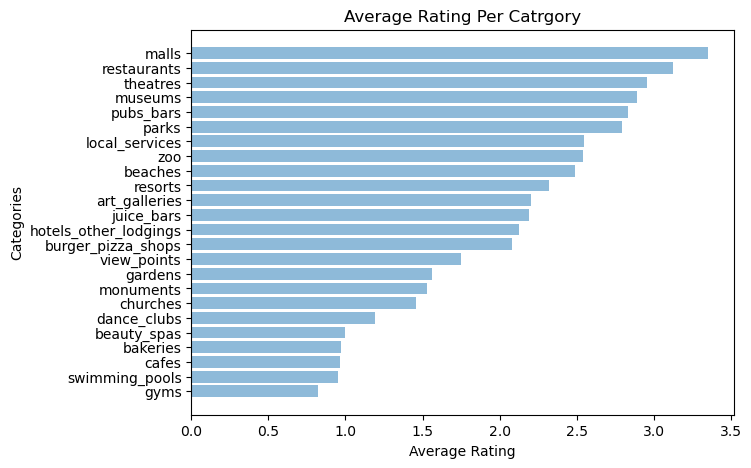

In [30]:
# Plotting average raing plot
plt.figure(figsize=(7,5))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align = 'center', alpha = 0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel("Average Rating")
plt.ylabel("Categories")
plt.title("Average Rating Per Catrgory")

Creating a id column

In [31]:
data_1 = data_no_missing.copy()

new = data_1['user_id'].str.split(' ',n=2,expand=True)
data_1['user'] = new[0]
data_1['id'] = new[1]
data_1 = data_1.drop(['user_id','user'],axis=1)
data_1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


In [32]:
data_final = data_1.copy(deep = True)
data_final.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


### 8. Hierarchical Clustering

Importing required pakages

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
z = sch.linkage(data_final, method = 'ward')
z

array([[2.99000000e+02, 3.00000000e+02, 1.00005000e+00, 2.00000000e+00],
       [6.72000000e+02, 6.73000000e+02, 1.00005000e+00, 2.00000000e+00],
       [2.16000000e+03, 2.16100000e+03, 1.00005000e+00, 2.00000000e+00],
       ...,
       [1.09020000e+04, 1.09050000e+04, 3.22742555e+04, 2.06400000e+03],
       [1.09060000e+04, 1.09070000e+04, 6.91602450e+04, 3.39200000e+03],
       [1.09080000e+04, 1.09090000e+04, 1.38199023e+05, 5.45600000e+03]])

Text(0.5, 1.0, 'hierarchical Clustering')

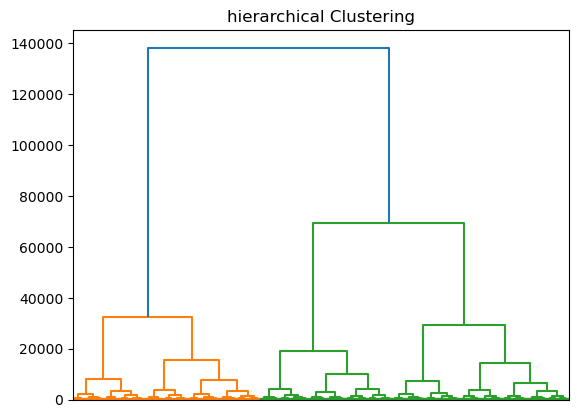

In [35]:
# Creating and plotting a dendogram
den = sch.dendrogram(z)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title("hierarchical Clustering")

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. So we need to determine the cutting line.**

**Creating a function to determine the cutting line**

In [36]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

**Creating a dendogram with cutting line**

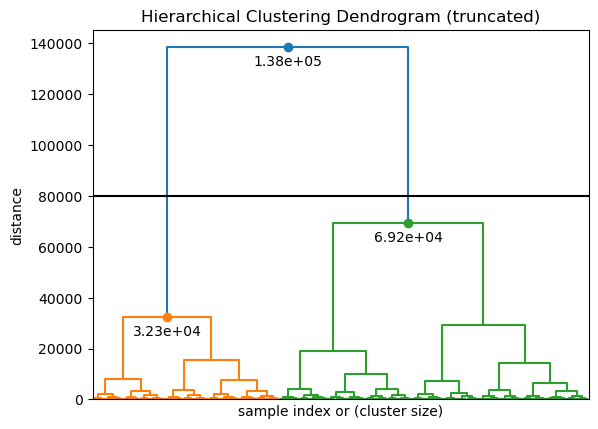

In [37]:
fd(z,leaf_rotation=90.,show_contracted=True,annotate_above=30000,max_d=80000)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)

**We can see that there are basically two cluster are possible**

**Creating a hierarchical clustering moodel**

In [38]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering 

In [39]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [40]:
# Fitting the model
y_cluster = hc_model.fit_predict(data_final)

In [41]:
# Adding the cluster column

data_clustered = data_final.copy()
data_clustered["Cluster"] = y_cluster.astype('object')
data_clustered.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,1
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,1
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,1
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,1


**Visualizing the Cluster**

In [42]:
col = list(data_final.columns)
col

['churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs_bars',
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'swimming_pools',
 'gyms',
 'bakeries',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens',
 'id']

In [53]:
#sns.pairplot(data_clustered, hue = "Cluster", diag_kind = "hist")

### 9. Conclusion

By using hierarchical clusterig we clustered review into two categories positive review and a negative review.

In [49]:
result = data_clustered.copy()

In [51]:
result.replace({'Cluster' : 1}, 'Positive', inplace = True)
result.replace({'Cluster' : 0}, 'Negeative', inplace = True)

In [52]:
result.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,Positive
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,Positive
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,Positive
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,Positive
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,Positive
